# $\Phi$-SO demo (quick SR)

In [1]:
# External packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Internal code import
import physo

### Dataset

In [2]:
data = pd.read_csv('phase_stddev_all.csv')
z = data['x'].astype(float)
y = data['y'].astype(float)
f = data['f'].astype(float)

# X = np.array(z)[np.newaxis, :]
X = np.stack((z, f), axis=0)

# Dataset
# z = np.random.uniform(-10, 10, 50)
# v = np.random.uniform(-10, 10, 50)
# X = np.stack((z, v), axis=0)
# y = 1.234*9.807*z + 1.234*v**2

In [3]:
X.shape

(2, 3833)

Where $X=(z,v)$, $z$ being a length of dimension $L^{1}, T^{0}, M^{0}$, v a velocity of dimension $L^{1}, T^{-1}, M^{0}$, $y=E$ if an energy of dimension $L^{2}, T^{-2}, M^{1}$.

Dataset plot

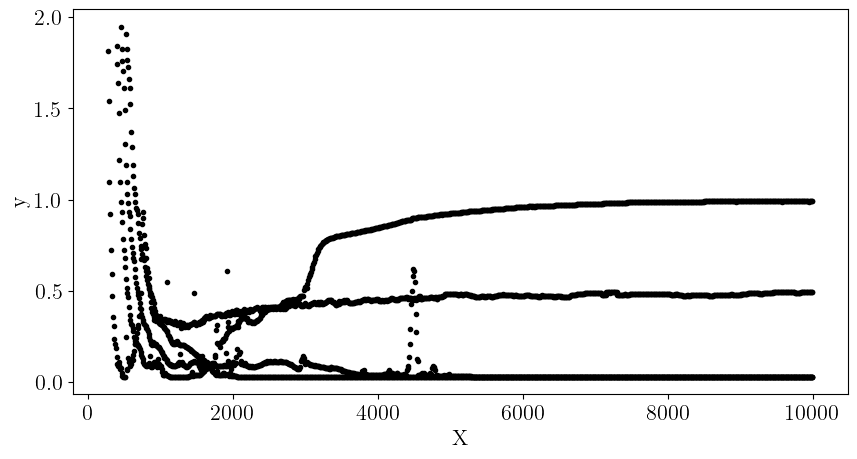

In [4]:
# n_dim = X.shape[0]
# fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
# for i in range (n_dim):
#     curr_ax = ax if n_dim==1 else ax[i]
#     curr_ax.plot(X[i], y, 'k.',)
#     curr_ax.set_xlabel("X[%i]"%(i))
#     curr_ax.set_ylabel("y")
# plt.show()

n_dim = 1
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
curr_ax = ax
curr_ax.plot(X[0], y, 'k.',)
curr_ax.set_xlabel("X")
curr_ax.set_ylabel("y")
plt.show()

### Running SR task

#### Available configurations

It should be noted that SR capabilities of `physo` are heavily dependent on hyperparameters, it is therefore recommended to tune hyperparameters to your own specific problem for doing science.
Summary of available currently configurations:

|  Config |                           Notes                           |
|:-------:|:---------------------------------------------------------:|
| config0 | Light config for demo purposes.                           |
| config1 | Tuned on a few physical cases.                            |
| config2 | [work in progress] Good starting point for doing science. |

By default, `config0` is used, however it is recommended to use the latest configuration currently available (`config1`) as a starting point for doing science.


#### Running physo

Given the units input variables $(x_0,..., x_n)$ (here $(z, v)$ ), the root variable $y$ (here $E$) as well as free and fixed constants, you can run an SR task to recover $f$ via:

(Allowing the use of a fixed constant $1$ of dimension $L^{0}, T^{0}, M^{0}$ (ie dimensionless) and free constants $m$ of dimension $L^{0}, T^{0}, M^{1}$ and $g$ of dimension $L^{1}, T^{-2}, M^{0}$.)

In [ ]:
# Running SR task
expression, logs = physo.SR(X, y,
                            # Giving names of variables (for display purposes)
                            X_names = [ "z", "f" ],
                            # Giving units of input variables
                            X_units = [ [1, 0, 0], [1, 0, 0] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "y",
                            # Giving units of the root variable
                            y_units = [1, 0, 0],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            # Units of fixed constants
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "a"       , "b"        ],
                            # Units offFree constants
                            free_consts_units = [ [1, 0, 0] , [1, 0, 0] ],
                            # Run config
                            run_config = physo.config.config0.config0,

)

SR task started...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16379.27it/s]


=========== Epoch 00000 ===========
-> Time 6.29 s

Overall best  at R=0.542258
-> Raw expression : 
        ⎛     0.5  ⎞
        ⎜  1.0     ⎟
-a⋅b⋅log⎜──────────⎟
        ⎜⎛    2   ⎞⎟
        ⎜⎜   f    ⎟⎟
        ⎜⎜────────⎟⎟
        ⎜⎜ 2      ⎟⎟
        ⎝⎝a  + b⋅z⎠⎠
────────────────────
         f          

Best of epoch at R=0.542258
-> Raw expression : 
        ⎛     0.5  ⎞
        ⎜  1.0     ⎟
-a⋅b⋅log⎜──────────⎟
        ⎜⎛    2   ⎞⎟
        ⎜⎜   f    ⎟⎟
        ⎜⎜────────⎟⎟
        ⎜⎜ 2      ⎟⎟
        ⎝⎝a  + b⋅z⎠⎠
────────────────────
         f          




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17741.88it/s]


=========== Epoch 00001 ===========
-> Time 12.87 s

Overall best  at R=0.542258
-> Raw expression : 
        ⎛     0.5  ⎞
        ⎜  1.0     ⎟
-a⋅b⋅log⎜──────────⎟
        ⎜⎛    2   ⎞⎟
        ⎜⎜   f    ⎟⎟
        ⎜⎜────────⎟⎟
        ⎜⎜ 2      ⎟⎟
        ⎝⎝a  + b⋅z⎠⎠
────────────────────
         f          

Best of epoch at R=0.520281
-> Raw expression : 
⎛                       2    ⎞    
⎜     cos(1.0)⋅1.0 + 1.0     ⎟    
⎜a⋅a⋅ℯ                       ⎟    
⎜──────────────────────── + b⎟⋅1.0
⎝           f                ⎠    




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15634.75it/s]


=========== Epoch 00002 ===========
-> Time 15.33 s

Overall best  at R=0.542258
-> Raw expression : 
        ⎛     0.5  ⎞
        ⎜  1.0     ⎟
-a⋅b⋅log⎜──────────⎟
        ⎜⎛    2   ⎞⎟
        ⎜⎜   f    ⎟⎟
        ⎜⎜────────⎟⎟
        ⎜⎜ 2      ⎟⎟
        ⎝⎝a  + b⋅z⎠⎠
────────────────────
         f          

Best of epoch at R=0.507884
-> Raw expression : 
    b - f + f     
──────────────────
          ⎛   0.5⎞
       0.5⎜⎛f⎞   ⎟
1.0⋅log   ⎜⎜─⎟   ⎟
          ⎝⎝b⎠   ⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16906.11it/s]


=========== Epoch 00003 ===========
-> Time 14.40 s

Overall best  at R=0.542258
-> Raw expression : 
        ⎛     0.5  ⎞
        ⎜  1.0     ⎟
-a⋅b⋅log⎜──────────⎟
        ⎜⎛    2   ⎞⎟
        ⎜⎜   f    ⎟⎟
        ⎜⎜────────⎟⎟
        ⎜⎜ 2      ⎟⎟
        ⎝⎝a  + b⋅z⎠⎠
────────────────────
         f          

Best of epoch at R=0.535205
-> Raw expression : 
                            0.5
         ⎛     0.5         ⎞   
         ⎜f⋅cos   (1.0) - z⎟   
-b - b + ⎜─────────────────⎟   
         ⎜      ⎛ f ⎞      ⎟   
         ⎜      ⎜───⎟      ⎟   
         ⎝      ⎝a⋅b⎠      ⎠   




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18735.53it/s]


=========== Epoch 00004 ===========
-> Time 11.76 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16733.71it/s]


=========== Epoch 00005 ===========
-> Time 13.06 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.588920
-> Raw expression : 
                         0.5            
 ⎛                   0.5⎞               
 ⎜⎛     2⎛-b ⎞      ⎞   ⎟               
 ⎜⎜- log ⎜───⎟ - 1.0⎟   ⎟    - 1.0      
 ⎝⎝      ⎝ f ⎠      ⎠   ⎠               
ℯ                                  + 1.0
────────────────────────────────────────
                  ⎛1⎞                   
                  ⎜─⎟                   
                  ⎝a⎠                   




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15105.46it/s]


=========== Epoch 00006 ===========
-> Time 14.42 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.584006
-> Raw expression : 
   ⎛            1.0       ⎞
-a⋅⎜1.0 - ────────────────⎟
   ⎜         ⎛a⋅f⋅(b + b)⎞⎟
   ⎜      sin⎜───────────⎟⎟
   ⎜         ⎜  ⎛  b  ⎞  ⎟⎟
   ⎜         ⎜  ⎜─────⎟  ⎟⎟
   ⎜         ⎜  ⎜⎛ 1 ⎞⎟  ⎟⎟
   ⎜         ⎜  ⎜⎜───⎟⎟  ⎟⎟
   ⎝         ⎝  ⎝⎝a⋅a⎠⎠  ⎠⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17381.25it/s]


=========== Epoch 00007 ===========
-> Time 14.70 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.535721
-> Raw expression : 
 ⎛                              0.5⎞ 
 ⎜     ⎛  ⎛           cos(1.0)⎞⎞   ⎟ 
-⎝-b + ⎝a⋅⎝a - b + f⋅ℯ        ⎠⎠   ⎠ 
─────────────────────────────────────
                 1.0                 




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15462.36it/s]


=========== Epoch 00008 ===========
-> Time 14.91 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.581087
-> Raw expression : 
   1     2⎛        1  ⎞    
b⋅───⋅sin ⎜f⋅1.0⋅─────⎟⋅1.0
  1.0     ⎝      a⋅1.0⎠    




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14453.65it/s]


=========== Epoch 00009 ===========
-> Time 17.08 s

Overall best  at R=0.602170
-> Raw expression : 
    a             b 
────────── - b + ───
    ⎛ 0.5⎞       1.0
    ⎜f   ⎟          
 sin⎜────⎟          
    ⎜ 0.5⎟          
    ⎝b   ⎠          
ℯ                   

Best of epoch at R=0.549496
-> Raw expression : 
                  b                  
─────────────────────────────────────
                                  0.5
       ⎛                0.5      ⎞   
    0.5⎜⎛   f          ⎞         ⎟   
-cos   ⎜⎜──────── - 1.0⎟    + 1.0⎟   
       ⎜⎜⎛  b   ⎞      ⎟         ⎟   
       ⎜⎜⎜──────⎟      ⎟         ⎟   
       ⎜⎜⎜   0.5⎟      ⎟         ⎟   
       ⎝⎝⎝1.0   ⎠      ⎠         ⎠   




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14937.94it/s]


=========== Epoch 00010 ===========
-> Time 16.83 s

Overall best  at R=0.611589
-> Raw expression : 
                          2
⎛      ⎛   0.5          ⎞⎞ 
⎜      ⎜1.0   ⋅a⋅f      ⎟⎟ 
⎜b⋅-cos⎜────────── - 1.0⎟⎟ 
⎜      ⎝   a⋅b          ⎠⎟ 
⎜────────────────────────⎟ 
⎜           0.5          ⎟ 
⎝          b             ⎠ 

Best of epoch at R=0.611589
-> Raw expression : 
                          2
⎛      ⎛   0.5          ⎞⎞ 
⎜      ⎜1.0   ⋅a⋅f      ⎟⎟ 
⎜b⋅-cos⎜────────── - 1.0⎟⎟ 
⎜      ⎝   a⋅b          ⎠⎟ 
⎜────────────────────────⎟ 
⎜           0.5          ⎟ 
⎝          b             ⎠ 




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16910.06it/s]


=========== Epoch 00011 ===========
-> Time 13.89 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15791.33it/s]


=========== Epoch 00012 ===========
-> Time 18.60 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.531047
-> Raw expression : 
          ⎛          1          ⎞
-b + f⋅cos⎜─────────────────────⎟
          ⎜  a      ⎛ 1  ⎞      ⎟
          ⎜- ─ - log⎜────⎟ + 1.0⎟
          ⎜  b      ⎜ 1.0⎟      ⎟
          ⎝         ⎝ℯ   ⎠      ⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14216.20it/s]


=========== Epoch 00013 ===========
-> Time 17.87 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.568426
-> Raw expression : 
                 0.5
  ⎛      1      ⎞   
b⋅⎜─────────────⎟   
  ⎜   ⎛   b    ⎞⎟   
  ⎜cos⎜────────⎟⎟   
  ⎜   ⎜⎛    2 ⎞⎟⎟   
  ⎜   ⎜⎜ ⎛b⎞  ⎟⎟⎟   
  ⎜   ⎜⎜ ⎜─⎟  ⎟⎟⎟   
  ⎜   ⎜⎜ ⎝b⎠  ⎟⎟⎟   
  ⎜   ⎜⎜──────⎟⎟⎟   
  ⎜   ⎜⎜⎛ f  ⎞⎟⎟⎟   
  ⎜   ⎜⎜⎜────⎟⎟⎟⎟   
  ⎝   ⎝⎝⎝-a⋅a⎠⎠⎠⎠   




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14941.72it/s]


=========== Epoch 00014 ===========
-> Time 20.05 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.595047
-> Raw expression : 
   ⎛      1       ⎞
log⎜──────────────⎟
   ⎜           0.5⎟
   ⎜⎛      0.5⎞   ⎟
   ⎜⎜ ⎛-1 ⎞   ⎟   ⎟
   ⎜⎜ ⎜───⎟   ⎟   ⎟
   ⎜⎜ ⎜⎛b⎞⎟   ⎟   ⎟
   ⎜⎜ ⎜⎜─⎟⎟   ⎟   ⎟
   ⎜⎜ ⎝⎝f⎠⎠   ⎟   ⎟
   ⎜⎜─────────⎟   ⎟
   ⎜⎜   ⎛ 1.0⎞⎟   ⎟
   ⎝⎝sin⎝ℯ   ⎠⎠   ⎠
───────────────────
       ⎛ b ⎞       
       ⎜───⎟       
       ⎝a⋅f⎠       




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15519.23it/s]


=========== Epoch 00015 ===========
-> Time 18.83 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.576113
-> Raw expression : 
                       2
      ⎛       a       ⎞ 
    b⋅⎜───────────────⎟ 
      ⎜     ⎛   ⎛-f ⎞⎞⎟ 
      ⎜b⋅sin⎜log⎜───⎟⎟⎟ 
      ⎝     ⎝   ⎝ b ⎠⎠⎠ 
a + ────────────────────
          sin(1.0)      




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12791.02it/s]


=========== Epoch 00016 ===========
-> Time 24.10 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.600470
-> Raw expression : 
     1      1    
a⋅───────⋅b⋅─⋅1.0
  ⎛  b  ⎞   a    
  ⎜─────⎟        
  ⎜⎛b⋅f⎞⎟        
  ⎜⎜───⎟⎟        
  ⎝⎝ a ⎠⎠        




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11619.41it/s]


=========== Epoch 00017 ===========
-> Time 28.01 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.584921
-> Raw expression : 
   -a    
─────────
⎛   b   ⎞
⎜───────⎟
⎜⎛  a  ⎞⎟
⎜⎜─────⎟⎟
⎜⎜a  1 ⎟⎟
⎜⎜─⋅───⎟⎟
⎜⎜b ⎛f⎞⎟⎟
⎜⎜  ⎜─⎟⎟⎟
⎝⎝  ⎝b⎠⎠⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11841.39it/s]


=========== Epoch 00018 ===========
-> Time 24.84 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.600470
-> Raw expression : 
   1.0  1.0
a⋅ℯ   ⋅ℯ   
───────────
    ⎛  b  ⎞
 sin⎜─────⎟
    ⎝1.0⋅f⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10246.60it/s]


=========== Epoch 00019 ===========
-> Time 27.09 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.608254
-> Raw expression : 
          1          
─────────────────────
⎛         a         ⎞
⎜───────────────────⎟
⎜⎛        b        ⎞⎟
⎜⎜─────────────────⎟⎟
⎜⎜⎛       1       ⎞⎟⎟
⎜⎜⎜───────────────⎟⎟⎟
⎜⎜⎜        b      ⎟⎟⎟
⎜⎜⎜f⋅─────────────⎟⎟⎟
⎜⎜⎜  ⎛     b     ⎞⎟⎟⎟
⎜⎜⎜  ⎜───────────⎟⎟⎟⎟
⎜⎜⎜  ⎜⎛    1    ⎞⎟⎟⎟⎟
⎜⎜⎜  ⎜⎜─────────⎟⎟⎟⎟⎟
⎝⎝⎝  ⎝⎝1.0 + 1.0⎠⎠⎠⎠⎠




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10321.49it/s]


=========== Epoch 00020 ===========
-> Time 31.73 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.584383
-> Raw expression : 
      a      
─────────────
        1    
a⋅f⋅─────────
           a 
    1.0⋅f⋅───
          1.0




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9722.90it/s]


=========== Epoch 00021 ===========
-> Time 27.17 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.583905
-> Raw expression : 
                      2
⎛   ⎛       1       ⎞⎞ 
⎜log⎜───────────────⎟⎟ 
⎜   ⎜   a        ⎛f⎞⎟⎟ 
⎜   ⎜────────⋅sin⎜─⎟⎟⎟ 
⎜   ⎜     ⎛b⎞    ⎝a⎠⎟⎟ 
⎜   ⎜b⋅cos⎜─⎟       ⎟⎟ 
⎜   ⎝     ⎝a⎠       ⎠⎟ 
⎜────────────────────⎟ 
⎜       ⎛ 1  ⎞       ⎟ 
⎜       ⎜────⎟       ⎟ 
⎜       ⎜ 0.5⎟       ⎟ 
⎝       ⎝a   ⎠       ⎠ 




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9714.79it/s]


=========== Epoch 00022 ===========
-> Time 33.75 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.589968
-> Raw expression : 
  ⎛        ⎛ 1 ⎞⎞
  ⎜     log⎜───⎟⎟
  ⎜        ⎜⎛b⎞⎟⎟
  ⎜        ⎜⎜─⎟⎟⎟
  ⎜a       ⎝⎝f⎠⎠⎟
a⋅⎜─ - ─────────⎟
  ⎜b    ⎛   0.5⎞⎟
  ⎜     ⎝1.0   ⎠⎟
  ⎝    ℯ        ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8615.90it/s]


=========== Epoch 00023 ===========
-> Time 32.36 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.612233
-> Raw expression : 
          0.5
⎛  a⋅a   ⎞   
⎜────────⎟   
⎜⎛   ⎛b⎞⎞⎟   
⎜⎜sin⎜─⎟⎟⎟   
⎜⎜   ⎝f⎠⎟⎟   
⎜⎜──────⎟⎟   
⎜⎜ ⎛a⎞  ⎟⎟   
⎜⎜ ⎜─⎟  ⎟⎟   
⎝⎝ ⎝a⎠  ⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8883.28it/s]


=========== Epoch 00024 ===========
-> Time 34.26 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.604484
-> Raw expression : 
          2⎛b⎞        
       log ⎜─⎟        
           ⎝f⎠        
──────────────────────
⎛         1          ⎞
⎜────────────────────⎟
⎜  ⎛   ⎛ -1  ⎞      ⎞⎟
⎜a⋅⎜sin⎜─────⎟ - 1.0⎟⎟
⎜  ⎜   ⎜⎛ 1 ⎞⎟      ⎟⎟
⎜  ⎜   ⎜⎜───⎟⎟      ⎟⎟
⎜  ⎜   ⎜⎜  1⎟⎟      ⎟⎟
⎜  ⎜   ⎜⎜a⋅─⎟⎟      ⎟⎟
⎝  ⎝   ⎝⎝  b⎠⎠      ⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8302.26it/s]


=========== Epoch 00025 ===========
-> Time 38.05 s

Overall best  at R=0.614747
-> Raw expression : 
   ⎛                       0.5            ⎞
   ⎜⎛             1       ⎞               ⎟
-a⋅⎜⎜-1.0 + ──────────────⎟    - 1.0 + 1.0⎟
   ⎜⎜       ⎛     ⎛  f  ⎞⎞⎟               ⎟
   ⎜⎜       ⎜b⋅sin⎜─────⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎛ f ⎞⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎜⎜───⎟⎟⎟⎟               ⎟
   ⎜⎜       ⎜     ⎝⎝1.0⎠⎠⎟⎟               ⎟
   ⎜⎜       ⎜────────────⎟⎟               ⎟
   ⎝⎝       ⎝     f      ⎠⎠               ⎠

Best of epoch at R=0.612153
-> Raw expression : 
           0.5
⎛    b    ⎞   
⎜─────────⎟   
⎜⎛  -1   ⎞⎟   
⎜⎜───────⎟⎟   
⎜⎜⎛  b  ⎞⎟⎟   
⎜⎜⎜─────⎟⎟⎟   
⎜⎜⎜⎛ 1 ⎞⎟⎟⎟   
⎜⎜⎜⎜───⎟⎟⎟⎟   
⎜⎜⎜⎜⎛f⎞⎟⎟⎟⎟   
⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   
⎝⎝⎝⎝⎝a⎠⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8273.72it/s]


=========== Epoch 00026 ===========
-> Time 35.52 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7991.66it/s]


=========== Epoch 00027 ===========
-> Time 37.95 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.600470
-> Raw expression : 
     ⎛a⎞
b⋅sin⎜─⎟
     ⎝b⎠
────────
   ⎛ 1 ⎞
sin⎜───⎟
   ⎜⎛f⎞⎟
   ⎜⎜─⎟⎟
   ⎝⎝a⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7313.70it/s]


=========== Epoch 00028 ===========
-> Time 38.54 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.600470
-> Raw expression : 
    -1       ⎛a⎞
a⋅───────⋅cos⎜─⎟
        1    ⎝f⎠
  b⋅1.0⋅─       
        f       




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7851.00it/s]


=========== Epoch 00029 ===========
-> Time 35.66 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.612153
-> Raw expression : 
                  0.5
⎛       a        ⎞   
⎜────────────────⎟   
⎜⎛      1       ⎞⎟   
⎜⎜──────────────⎟⎟   
⎜⎜⎛     a      ⎞⎟⎟   
⎜⎜⎜────────────⎟⎟⎟   
⎜⎜⎜   ⎛   1   ⎞⎟⎟⎟   
⎜⎜⎜sin⎜───────⎟⎟⎟⎟   
⎜⎜⎜   ⎜⎛  f  ⎞⎟⎟⎟⎟   
⎜⎜⎜   ⎜⎜─────⎟⎟⎟⎟⎟   
⎜⎜⎜   ⎜⎜   1 ⎟⎟⎟⎟⎟   
⎜⎜⎜   ⎜⎜b⋅───⎟⎟⎟⎟⎟   
⎝⎝⎝   ⎝⎝  1.0⎠⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7488.83it/s]


=========== Epoch 00030 ===========
-> Time 40.12 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.612153
-> Raw expression : 
         0.5
⎛   a   ⎞   
⎜───────⎟   
⎜⎛  1  ⎞⎟   
⎜⎜─────⎟⎟   
⎜⎜⎛ a ⎞⎟⎟   
⎜⎜⎜───⎟⎟⎟   
⎜⎜⎜⎛b⎞⎟⎟⎟   
⎜⎜⎜⎜─⎟⎟⎟⎟   
⎝⎝⎝⎝f⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7498.63it/s]


=========== Epoch 00031 ===========
-> Time 38.66 s

Overall best  at R=0.615268
-> Raw expression : 
          1           
──────────────────────
⎛        b⋅f         ⎞
⎜────────────────────⎟
⎜⎛        b         ⎞⎟
⎜⎜──────────────────⎟⎟
⎜⎜⎛       1        ⎞⎟⎟
⎜⎜⎜────────────────⎟⎟⎟
⎜⎜⎜⎛      f       ⎞⎟⎟⎟
⎜⎜⎜⎜──────────────⎟⎟⎟⎟
⎜⎜⎜⎜           0.5⎟⎟⎟⎟
⎜⎜⎜⎜⎛    a    ⎞   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜─────────⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎛   b   ⎞⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜───────⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜─────⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎛ f ⎞⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟   ⎟⎟⎟⎟
⎜⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟   ⎟⎟⎟⎟
⎝⎝⎝⎝⎝⎝⎝⎝⎝b⎠⎠⎠⎠⎠   ⎠⎠⎠⎠

Best of epoch at R=0.613605
-> Raw expression : 
                      0.5
⎛    ⎛         1    ⎞⎞   
⎜a⋅a⋅⎜1.0 + ────────⎟⎟   
⎜    ⎜         ⎛ 1 ⎞⎟⎟   
⎜    ⎜      sin⎜───⎟⎟⎟   
⎜    ⎜         ⎜⎛f⎞⎟⎟⎟   
⎜    ⎜         ⎜⎜─⎟⎟⎟⎟   
⎝    ⎝         ⎝⎝b⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7527.17it/s]


=========== Epoch 00032 ===========
-> Time 38.54 s

Overall best  at R=0.616587
-> Raw expression : 
     ⎛      1      ⎞
b⋅sin⎜─────────────⎟
     ⎜          0.5⎟
     ⎜ ⎛   1   ⎞   ⎟
     ⎜-⎜───────⎟   ⎟
     ⎜ ⎜ 1    f⎟   ⎟
     ⎜ ⎜─── + ─⎟   ⎟
     ⎜ ⎜⎛a⎞   b⎟   ⎟
     ⎜ ⎜⎜─⎟    ⎟   ⎟
     ⎝ ⎝⎝b⎠    ⎠   ⎠

Best of epoch at R=0.616587
-> Raw expression : 
     ⎛      1      ⎞
b⋅sin⎜─────────────⎟
     ⎜          0.5⎟
     ⎜ ⎛   1   ⎞   ⎟
     ⎜-⎜───────⎟   ⎟
     ⎜ ⎜ 1    f⎟   ⎟
     ⎜ ⎜─── + ─⎟   ⎟
     ⎜ ⎜⎛a⎞   b⎟   ⎟
     ⎜ ⎜⎜─⎟    ⎟   ⎟
     ⎝ ⎝⎝b⎠    ⎠   ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7307.33it/s]


=========== Epoch 00033 ===========
-> Time 40.55 s

Overall best  at R=0.616587
-> Raw expression : 
     ⎛      1      ⎞
b⋅sin⎜─────────────⎟
     ⎜          0.5⎟
     ⎜ ⎛   1   ⎞   ⎟
     ⎜-⎜───────⎟   ⎟
     ⎜ ⎜ 1    f⎟   ⎟
     ⎜ ⎜─── + ─⎟   ⎟
     ⎜ ⎜⎛a⎞   b⎟   ⎟
     ⎜ ⎜⎜─⎟    ⎟   ⎟
     ⎝ ⎝⎝b⎠    ⎠   ⎠

Best of epoch at R=0.608897
-> Raw expression : 
      ⎛   ⎛f⎞⎞
-b⋅log⎜sin⎜─⎟⎟
      ⎝   ⎝a⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7058.08it/s]


=========== Epoch 00034 ===========
-> Time 41.25 s

Overall best  at R=0.616587
-> Raw expression : 
     ⎛      1      ⎞
b⋅sin⎜─────────────⎟
     ⎜          0.5⎟
     ⎜ ⎛   1   ⎞   ⎟
     ⎜-⎜───────⎟   ⎟
     ⎜ ⎜ 1    f⎟   ⎟
     ⎜ ⎜─── + ─⎟   ⎟
     ⎜ ⎜⎛a⎞   b⎟   ⎟
     ⎜ ⎜⎜─⎟    ⎟   ⎟
     ⎝ ⎝⎝b⎠    ⎠   ⎠

Best of epoch at R=0.610069
-> Raw expression : 
    ⎛ 1 ⎞
 sin⎜───⎟
    ⎜⎛b⎞⎟
    ⎜⎜─⎟⎟
    ⎝⎝f⎠⎠
─────────
⎛   a   ⎞
⎜───────⎟
⎜⎛ -a  ⎞⎟
⎜⎜─────⎟⎟
⎜⎜⎛ b ⎞⎟⎟
⎜⎜⎜───⎟⎟⎟
⎝⎝⎝a⋅a⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7097.77it/s]


=========== Epoch 00035 ===========
-> Time 43.10 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6882.01it/s]


=========== Epoch 00036 ===========
-> Time 45.15 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.587992
-> Raw expression : 
                 0.5
⎛       b       ⎞   
⎜───────────────⎟   
⎜⎛     -a      ⎞⎟   
⎜⎜─────────────⎟⎟   
⎜⎜⎛    -1     ⎞⎟⎟   
⎜⎜⎜───────────⎟⎟⎟   
⎜⎜⎜⎛    a    ⎞⎟⎟⎟   
⎜⎜⎜⎜─────────⎟⎟⎟⎟   
⎜⎜⎜⎜⎛   b   ⎞⎟⎟⎟⎟   
⎜⎜⎜⎜⎜───────⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎛  1  ⎞⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎜─────⎟⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎜⎛-f ⎞⎟⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟⎟⎟⎟   
⎜⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟⎟⎟⎟   
⎝⎝⎝⎝⎝⎝⎝⎝a⎠⎠⎠⎠⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6736.80it/s]


=========== Epoch 00037 ===========
-> Time 43.41 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.601007
-> Raw expression : 
     ⎛  -1  ⎞
     ⎜ ─────⎟
     ⎜ ⎛-1 ⎞⎟
     ⎜ ⎜───⎟⎟
     ⎜ ⎝1.0⎠⎟
b⋅sin⎝ℯ     ⎠
─────────────
       ⎛a⎞   
    sin⎜─⎟   
       ⎝f⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7057.93it/s]


=========== Epoch 00038 ===========
-> Time 41.55 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.610175
-> Raw expression : 
     ⎛f⎞
b⋅sin⎜─⎟
     ⎝a⎠
────────
    ⎛f⎞ 
 log⎜─⎟ 
    ⎝b⎠ 




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7235.64it/s]


=========== Epoch 00039 ===========
-> Time 36.90 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.613834
-> Raw expression : 
     ⎛    f    ⎞
b⋅sin⎜─────────⎟
     ⎜⎛   b   ⎞⎟
     ⎜⎜───────⎟⎟
     ⎜⎜    b⋅f⎟⎟
     ⎜⎜1.0⋅───⎟⎟
     ⎝⎝    a⋅f⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6907.54it/s]


=========== Epoch 00040 ===========
-> Time 38.52 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.613533
-> Raw expression : 
   ⎛   ⎛     1     ⎞⎞
log⎜sin⎜───────────⎟⎟
   ⎜   ⎜⎛    1    ⎞⎟⎟
   ⎜   ⎜⎜─────────⎟⎟⎟
   ⎜   ⎜⎜ a    1  ⎟⎟⎟
   ⎜   ⎜⎜───⋅─────⎟⎟⎟
   ⎜   ⎜⎜⎛1⎞     b⎟⎟⎟
   ⎜   ⎜⎜⎜─⎟ a⋅a⋅─⎟⎟⎟
   ⎝   ⎝⎝⎝a⎠     f⎠⎠⎠
─────────────────────
         ⎛1⎞         
         ⎜─⎟         
         ⎝b⎠         




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7193.84it/s]


=========== Epoch 00041 ===========
-> Time 36.52 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.600585
-> Raw expression : 
    1     
──────────
⎛   a    ⎞
⎜────────⎟
⎜⎛ a⋅b  ⎞⎟
⎜⎜──────⎟⎟
⎜⎜   ⎛a⎞⎟⎟
⎜⎜sin⎜─⎟⎟⎟
⎝⎝   ⎝f⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6932.77it/s]


=========== Epoch 00042 ===========
-> Time 34.65 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.608299
-> Raw expression : 
     ⎛      f         a⎞
a⋅sin⎜───────────── + ─⎟
     ⎜⎛     b     ⎞   a⎟
     ⎜⎜───────────⎟    ⎟
     ⎜⎜⎛    1    ⎞⎟    ⎟
     ⎜⎜⎜─────────⎟⎟    ⎟
     ⎜⎜⎜       1 ⎟⎟    ⎟
     ⎜⎜⎜1.0 + ───⎟⎟    ⎟
     ⎜⎜⎜      ⎛f⎞⎟⎟    ⎟
     ⎜⎜⎜      ⎜─⎟⎟⎟    ⎟
     ⎝⎝⎝      ⎝f⎠⎠⎠    ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6810.27it/s]


=========== Epoch 00043 ===========
-> Time 33.58 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.613834
-> Raw expression : 
     ⎛1.0⋅f⎞
a⋅sin⎜─────⎟
     ⎝  b  ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7180.59it/s]


=========== Epoch 00044 ===========
-> Time 34.07 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.609984
-> Raw expression : 
   ⎛    1    ⎞      
sin⎜─────────⎟⋅a⋅1.0
   ⎜⎛   b   ⎞⎟      
   ⎜⎜───────⎟⎟      
   ⎜⎜    a  ⎟⎟      
   ⎜⎜f⋅─────⎟⎟      
   ⎜⎜  ⎛ b ⎞⎟⎟      
   ⎜⎜  ⎜───⎟⎟⎟      
   ⎜⎜  ⎜⎛b⎞⎟⎟⎟      
   ⎜⎜  ⎜⎜─⎟⎟⎟⎟      
   ⎝⎝  ⎝⎝f⎠⎠⎠⎠      




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7282.90it/s]


=========== Epoch 00045 ===========
-> Time 36.04 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.613179
-> Raw expression : 
    ⎛   -1     ⎞ 
-sin⎜──────────⎟ 
    ⎜       0.5⎟ 
    ⎜⎛b + b⎞   ⎟ 
    ⎜⎜─────⎟   ⎟ 
    ⎝⎝  f  ⎠   ⎠ 
─────────────────
     ⎛  f  ⎞     
     ⎜─────⎟     
     ⎜⎛ a ⎞⎟     
     ⎜⎜───⎟⎟     
     ⎜⎜⎛1⎞⎟⎟     
     ⎜⎜⎜─⎟⎟⎟     
     ⎝⎝⎝a⎠⎠⎠     




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7199.48it/s]


=========== Epoch 00046 ===========
-> Time 33.02 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.610152
-> Raw expression : 
     ⎛     a⋅a     ⎞
a⋅sin⎜─────────────⎟
     ⎜⎛     f     ⎞⎟
     ⎜⎜───────────⎟⎟
     ⎜⎜⎛    f    ⎞⎟⎟
     ⎜⎜⎜─────────⎟⎟⎟
     ⎜⎜⎜⎛   a   ⎞⎟⎟⎟
     ⎜⎜⎜⎜───────⎟⎟⎟⎟
     ⎜⎜⎜⎜⎛  f  ⎞⎟⎟⎟⎟
     ⎜⎜⎜⎜⎜─────⎟⎟⎟⎟⎟
     ⎜⎜⎜⎜⎜⎛ b ⎞⎟⎟⎟⎟⎟
     ⎜⎜⎜⎜⎜⎜───⎟⎟⎟⎟⎟⎟
     ⎜⎜⎜⎜⎜⎜⎛1⎞⎟⎟⎟⎟⎟⎟
     ⎜⎜⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟⎟⎟
     ⎝⎝⎝⎝⎝⎝⎝f⎠⎠⎠⎠⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7113.91it/s]


=========== Epoch 00047 ===========
-> Time 30.59 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.613834
-> Raw expression : 
   ⎛ -f  ⎞
sin⎜─────⎟
   ⎝b + b⎠
──────────
   ⎛1⎞    
   ⎜─⎟    
   ⎝a⎠    




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7510.13it/s]


=========== Epoch 00048 ===========
-> Time 29.15 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.603636
-> Raw expression : 
     ⎛-1 ⎞
b⋅sin⎜───⎟
     ⎜⎛a⎞⎟
     ⎜⎜─⎟⎟
     ⎝⎝f⎠⎠
──────────
    ⎛ 1 ⎞ 
 sin⎜───⎟ 
    ⎜⎛b⎞⎟ 
    ⎜⎜─⎟⎟ 
    ⎝⎝b⎠⎠ 




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7824.92it/s]


=========== Epoch 00049 ===========
-> Time 28.22 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.608857
-> Raw expression : 
     ⎛  f⋅f  ⎞
b⋅sin⎜───────⎟
     ⎜⎛  f  ⎞⎟
     ⎜⎜─────⎟⎟
     ⎜⎜⎛ f ⎞⎟⎟
     ⎜⎜⎜───⎟⎟⎟
     ⎝⎝⎝a⋅b⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8190.74it/s]


=========== Epoch 00050 ===========
-> Time 27.63 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.614071
-> Raw expression : 
       ⎛   f⋅f   ⎞    
- b⋅sin⎜─────────⎟ + b
       ⎜⎛   b   ⎞⎟    
       ⎜⎜───────⎟⎟    
       ⎜⎜⎛  1  ⎞⎟⎟    
       ⎜⎜⎜─────⎟⎟⎟    
       ⎜⎜⎜⎛ b ⎞⎟⎟⎟    
       ⎜⎜⎜⎜───⎟⎟⎟⎟    
       ⎜⎜⎜⎜⎛a⎞⎟⎟⎟⎟    
       ⎜⎜⎜⎜⎜─⎟⎟⎟⎟⎟    
       ⎝⎝⎝⎝⎝f⎠⎠⎠⎠⎠    




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7311.54it/s]


=========== Epoch 00051 ===========
-> Time 26.47 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.610069
-> Raw expression : 
     ⎛    -1     ⎞
a⋅sin⎜───────────⎟
     ⎜    ⎛  1  ⎞⎟
     ⎜-log⎜─────⎟⎟
     ⎜    ⎜b   b⎟⎟
     ⎜    ⎜─ + ─⎟⎟
     ⎝    ⎝f   b⎠⎠
──────────────────
       1.0        




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7043.88it/s]


=========== Epoch 00052 ===========
-> Time 30.87 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.610505
-> Raw expression : 
     ⎛b + f⎞    ⎛f⎞
a⋅sin⎜─────⎟⋅sin⎜─⎟
     ⎝  a  ⎠    ⎝b⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6964.05it/s]


=========== Epoch 00053 ===========
-> Time 30.92 s

Overall best  at R=0.618272
-> Raw expression : 
      ⎛    1     ⎞
-a⋅sin⎜──────────⎟
      ⎜       0.5⎟
      ⎜⎛  1  ⎞   ⎟
      ⎜⎜─────⎟   ⎟
      ⎜⎜⎛  2⎞⎟   ⎟
      ⎜⎜⎜ f ⎟⎟   ⎟
      ⎜⎜⎜───⎟⎟   ⎟
      ⎝⎝⎝b⋅f⎠⎠   ⎠

Best of epoch at R=0.617281
-> Raw expression : 
          ⎛       0.5⎞
          ⎜⎛  f  ⎞   ⎟
1.0⋅-a⋅sin⎜⎜─────⎟   ⎟
          ⎜⎜⎛-b ⎞⎟   ⎟
          ⎜⎜⎜───⎟⎟   ⎟
          ⎜⎜⎜⎛b⎞⎟⎟   ⎟
          ⎜⎜⎜⎜─⎟⎟⎟   ⎟
          ⎝⎝⎝⎝a⎠⎠⎠   ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6530.55it/s]


=========== Epoch 00054 ===========
-> Time 32.19 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6727.25it/s]


=========== Epoch 00055 ===========
-> Time 29.08 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.613834
-> Raw expression : 
     ⎛f⎞    ⎛-b ⎞
f⋅sin⎜─⎟⋅sin⎜───⎟
     ⎝a⎠    ⎝ f ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6308.66it/s]


=========== Epoch 00056 ===========
-> Time 33.72 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.618272
-> Raw expression : 
     ⎛   1   ⎞
a⋅sin⎜───────⎟
     ⎜    0.5⎟
     ⎜ ⎛b⎞   ⎟
     ⎜-⎜─⎟   ⎟
     ⎝ ⎝f⎠   ⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6175.41it/s]


=========== Epoch 00057 ===========
-> Time 31.22 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.614385
-> Raw expression : 
                       0.5
  ⎛   ⎛a⎞       1     ⎞   
a⋅⎜sin⎜─⎟ + ──────────⎟   
  ⎜   ⎝a⎠   ⎛   b    ⎞⎟   
  ⎜         ⎜────────⎟⎟   
  ⎜         ⎜⎛  f   ⎞⎟⎟   
  ⎜         ⎜⎜──────⎟⎟⎟   
  ⎜         ⎜⎜   ⎛f⎞⎟⎟⎟   
  ⎜         ⎜⎜sin⎜─⎟⎟⎟⎟   
  ⎝         ⎝⎝   ⎝f⎠⎠⎠⎠   




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6485.75it/s]


=========== Epoch 00058 ===========
-> Time 31.29 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.610069
-> Raw expression : 
           ⎛    1    ⎞
(a + b)⋅sin⎜─────────⎟
           ⎜⎛   b   ⎞⎟
           ⎜⎜───────⎟⎟
           ⎜⎜⎛  f  ⎞⎟⎟
           ⎜⎜⎜─────⎟⎟⎟
           ⎜⎜⎜⎛-f ⎞⎟⎟⎟
           ⎜⎜⎜⎜───⎟⎟⎟⎟
           ⎝⎝⎝⎝ f ⎠⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6707.85it/s]


=========== Epoch 00059 ===========
-> Time 31.96 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.617281
-> Raw expression : 
    ⎛    1     ⎞ 
-sin⎜──────────⎟ 
    ⎜       0.5⎟ 
    ⎜⎛  1  ⎞   ⎟ 
    ⎜⎜─────⎟   ⎟ 
    ⎜⎜⎛ f ⎞⎟   ⎟ 
    ⎜⎜⎜───⎟⎟   ⎟ 
    ⎜⎜⎜  a⎟⎟   ⎟ 
    ⎜⎜⎜b⋅─⎟⎟   ⎟ 
    ⎝⎝⎝  a⎠⎠   ⎠ 
─────────────────
       ⎛1⎞       
       ⎜─⎟       
       ⎝b⎠       




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6596.86it/s]


=========== Epoch 00060 ===========
-> Time 32.33 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.617282
-> Raw expression : 
       -b         
──────────────────
      1          f
────────────── + ─
a      ⎛a + f⎞   f
─ + sin⎜─────⎟    
f      ⎝  a  ⎠    




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6395.14it/s]


=========== Epoch 00061 ===========
-> Time 32.90 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.610093
-> Raw expression : 
     ⎛ 1      1  ⎞    
b⋅sin⎜─── + ─────⎟⋅1.0
     ⎜⎛f⎞   ⎛-1 ⎞⎟    
     ⎜⎜─⎟   ⎜───⎟⎟    
     ⎜⎝b⎠   ⎜⎛f⎞⎟⎟    
     ⎜      ⎜⎜─⎟⎟⎟    
     ⎝      ⎝⎝a⎠⎠⎠    




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6278.88it/s]


=========== Epoch 00062 ===========
-> Time 34.82 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.617281
-> Raw expression : 
     ⎛     1      ⎞
a⋅sin⎜────────────⎟
     ⎜⎛   -1     ⎞⎟
     ⎜⎜──────────⎟⎟
     ⎜⎜⎛   f    ⎞⎟⎟
     ⎜⎜⎜────────⎟⎟⎟
     ⎜⎜⎜     0.5⎟⎟⎟
     ⎜⎜⎜⎛ f ⎞   ⎟⎟⎟
     ⎜⎜⎜⎜───⎟   ⎟⎟⎟
     ⎜⎜⎜⎜⎛1⎞⎟   ⎟⎟⎟
     ⎜⎜⎜⎜⎜─⎟⎟   ⎟⎟⎟
     ⎝⎝⎝⎝⎝a⎠⎠   ⎠⎠⎠




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6537.94it/s]


=========== Epoch 00063 ===========
-> Time 32.01 s

Overall best  at R=0.618272
-> Raw expression : 
     ⎛      0.5⎞
     ⎜ ⎛a⋅f⎞   ⎟
a⋅sin⎜-⎜───⎟   ⎟
     ⎝ ⎝a⋅b⎠   ⎠

Best of epoch at R=0.613834
-> Raw expression : 
   ⎛ -1  ⎞    ⎛f⎞
sin⎜─────⎟⋅sin⎜─⎟
   ⎜⎛-1 ⎞⎟    ⎝a⎠
   ⎜⎜───⎟⎟       
   ⎜⎜⎛b⎞⎟⎟       
   ⎜⎜⎜─⎟⎟⎟       
   ⎝⎝⎝a⎠⎠⎠       
─────────────────
       ⎛1⎞       
       ⎜─⎟       
       ⎝b⎠       




 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 552/1000 [00:14<00:12, 37.22it/s]

### Inspecting the best expression found

In [ ]:
# Inspecting the best expression found
# In ascii
print("\nIn ascii:")
print(expression.get_infix_pretty(do_simplify=True))
# In latex
print("\nIn latex")
print(expression.get_infix_latex(do_simplify=True))
# Free constants values
print("\nFree constants values")
print(expression.free_const_values.cpu().detach().numpy())

### Inspecting pareto front expressions

In [ ]:

# Inspecting pareto front expressions
pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()
for i, prog in enumerate(pareto_front_expressions):
    # Showing expression
    print(prog.get_infix_pretty(do_simplify=True))
    # Showing free constant
    free_consts = prog.free_const_values.detach().cpu().numpy()
    for j in range (len(free_consts)):
        print("%s = %f"%(prog.library.free_const_names[j], free_consts[j]))
    # Showing RMSE
    print("RMSE = {:e}".format(pareto_front_rmse[i]))
    print("-------------\n")